# Earthquake

https://www.nature.com/articles/ngeo2796

http://rspl.royalsocietypublishing.org/content/61/369-377/455

    [-9.214, -7.616] Latitude
    [-244.259, -242.699] Longitude

In [1]:
import numpy as np
import pandas as pd
from astropy.time import Time 
import ephem

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read
filename = "./lombok_past_2month_gt2.5.csv"
#filename = "lombok_02.csv"
data = pd.read_csv(filename)

data[-5:]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
99,2018-07-28T22:58:44.060Z,-8.1808,116.4971,10.00,4.7,mb,NaN,80,2.338,1.38,...,2018-08-17T03:32:46.040Z,"9km NE of Anyar, Indonesia",earthquake,4.8,1.9,0.175,10,reviewed,us,us
100,2018-07-28T22:56:45.090Z,-8.2593,116.5465,10.00,4.7,mb,NaN,134,2.378,0.54,...,2018-08-17T03:21:30.040Z,"0km NNW of Obelobel, Indonesia",earthquake,8.9,1.9,0.209,7,reviewed,us,us
101,2018-07-28T22:55:36.080Z,-8.2139,116.5888,10.00,4.8,mb,NaN,75,2.424,0.74,...,2018-08-17T03:13:11.040Z,"7km NE of Obelobel, Indonesia",earthquake,9.2,1.9,0.197,8,reviewed,us,us
102,2018-07-28T22:47:38.740Z,-8.2395,116.5080,14.00,6.4,mww,NaN,14,2.342,1.15,...,2018-08-19T15:31:20.296Z,"5km WNW of Obelobel, Indonesia",earthquake,3.6,1.6,0.054,33,reviewed,us,us
103,2018-07-01T06:00:14.040Z,-8.5723,116.2467,121.93,4.1,mb,NaN,85,2.074,0.91,...,2018-07-27T13:05:59.040Z,"3km S of Sesaot Lauq, Indonesia",earthquake,8.3,8.8,0.117,20,reviewed,us,us


In [3]:
time   = data['time']
lat = data['latitude']
lon = data['longitude']
mag = data['mag']

In [4]:
time[0]

'2018-08-26T03:54:03.860Z'

## Filtering

In [5]:
limit = 2.5
mag_lim = mag[mag >= limit]
time_lim = time[mag >= limit]
lat_lim = lat[mag >= limit]
lon_lim = lon[mag >= limit]

In [6]:
t = Time(time_lim.tolist(), format='isot', scale='utc') # input to astropy
t_jd = t.jd # convert to JD

In [7]:
mag=mag_lim

In [8]:
# t = Time(time.tolist(), format='isot', scale='utc') # input to astropy
# t_jd = t.jd

## Time vs Mag

Text(0,0.5,'Magnitude')

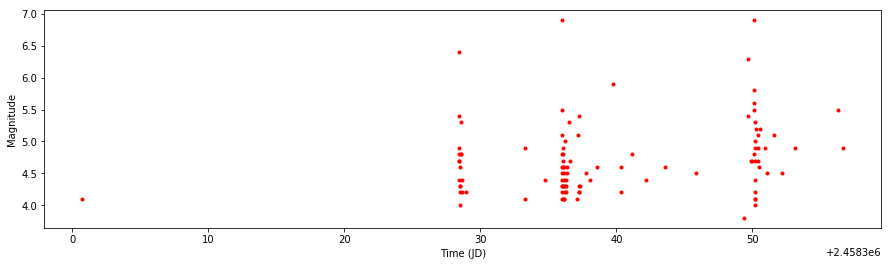

In [9]:
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(111)
ax.plot(t_jd, mag, 'r.', alpha=1.0)
ax.set_xlabel("Time (JD)")
ax.set_ylabel("Magnitude")

# #make some vertical lines around the time of perihelion and aphelion
# for i in range(2):
#     peri = t_jd[-1] + i*365.25
#     aphe = t_jd[-1] + 182.625 + i*365.25
#     plt.axvline(x=peri, linewidth=1.0, color='black')
#     plt.axvline(x=aphe, linewidth=0.5, linestyle='dashdot', color="blue")

In [10]:
# t_folded = (t_jd - t_jd[0])  % 365.26

# theta = t_folded/365.26 * 2 * np.pi

# fig = plt.figure(figsize=(7,7))
# ax = plt.subplot(111, projection='polar')
# ax.plot(theta, mag, 'ro', alpha=1.0) # magnitude as radius
# ax.set_rmin(4.0)
# ax.set_rmax(9.0)
# ax.grid(True)
# plt.show()

### Moon

In [11]:
longitude = (116.818 + 115.752) / 2
latitude = (-9.871 + -7.264) / 2

gatech = ephem.Observer()

gatech.lon = str(longitude)
gatech.lat = str(latitude)
gatech.elevation = 0

In [12]:
alt = [] 
az = []
phase = []
for ti in t:
    x = ti.datetime
    tformat = "{0}/{1}/{2} {3}:{4}:{5}".format(x.year, x.month, x.day, x.hour, x.minute, x.second)
    gatech.date = tformat
    #gatech.date = '1984/5/30 16:22:56'

    mo = ephem.Moon(gatech)

    #print(gatech.lon, gatech.lat, gatech.date)
    alt.append(mo.alt) 
    az.append(mo.az)
    phase.append(mo.phase)
    
    
alt = np.array(alt)
az = np.array(az)
phase = np.array(phase)

## Alt vs Magnitude

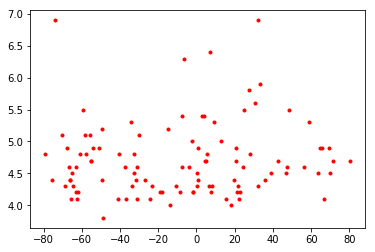

In [13]:
plt.plot(alt*180/np.pi, mag, 'r.')

## Azimuth vs Magnitude

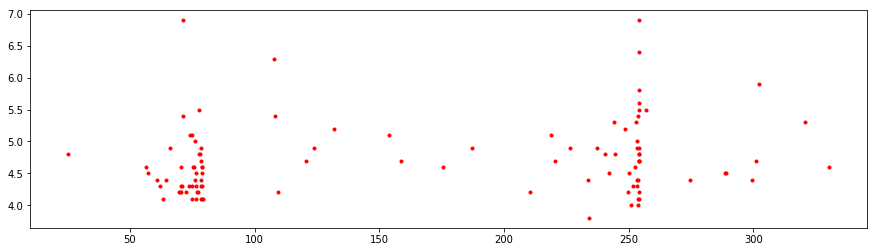

In [15]:
fig = plt.figure(figsize=(15,4))
plt.plot(az[:-1]*180/np.pi, mag[:-1], 'r.')

## Time vs Altitude

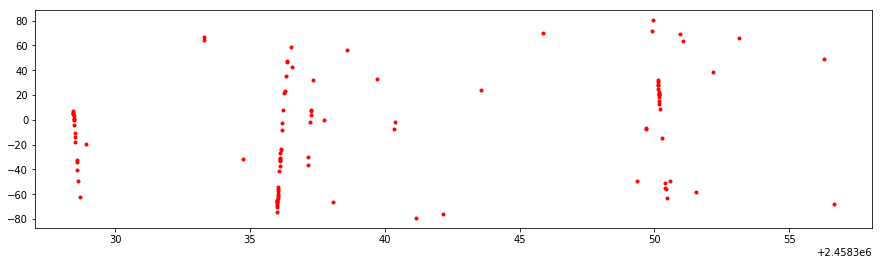

In [16]:
fig = plt.figure(figsize=(15,4))
plt.plot(t_jd[:-1], alt[:-1]*180/np.pi, 'r.')

## Time vs Azimuth

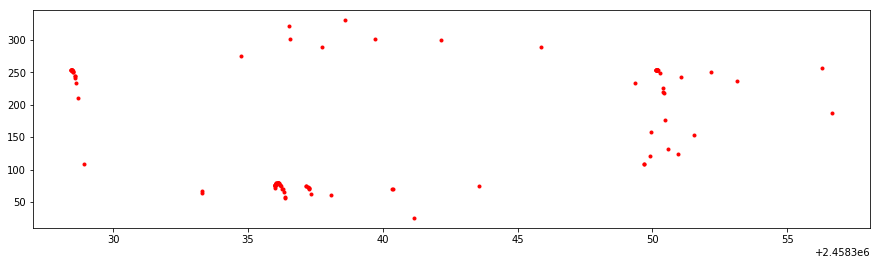

In [17]:
fig = plt.figure(figsize=(15,4))
plt.plot(t_jd[:-1], az[:-1]*180/np.pi, 'r.')

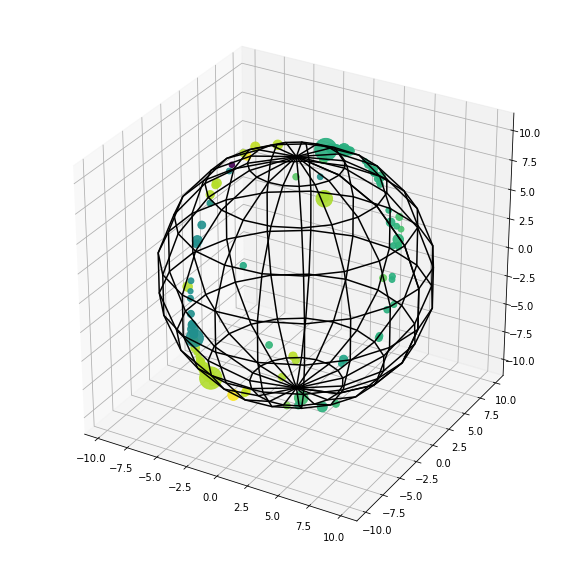

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

r = 10
al = alt+(np.pi/2)
xs = r*np.sin(al)*np.cos(az)
ys = r*np.sin(al)*np.sin(az)
zs = r*np.cos(al)
ax.scatter(xs, ys, zs, c=t_jd, marker='o', alpha=0.9, s=0.5*np.exp(mag))

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = r*np.cos(u)*np.sin(v)
y = r*np.sin(u)*np.sin(v)
z = r*np.cos(v)
ax.plot_wireframe(x, y, z, color="k")

# al = np.random.uniform(0, np.pi, 1000)
# azi = np.random.uniform(0, 2*np.pi, 1000)
# xa = r*np.sin(al)*np.cos(azi)
# ya = r*np.sin(al)*np.sin(azi)
# za = r*np.cos(al)
# ax.scatter(xa, ya, za, c="blue", marker='.')

plt.show()

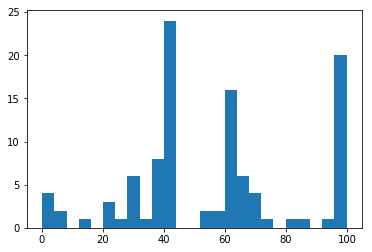

In [19]:
plt.hist(phase, bins=25);

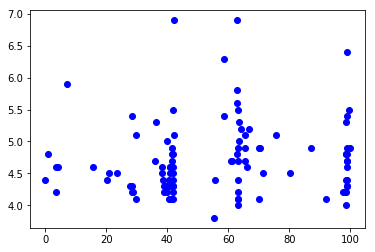

In [20]:
plt.plot(phase, mag, 'bo')